In [1]:
!pip install transformers -U


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 37.3 MB/s eta 0:00:0000:010:01
  Attempting uninstall: transformers
    Found existing installation: transformers 4.48.2
    Uninstalling transformers-4.48.2:
      Successfully uninstalled transformers-4.48.2

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bittlingmayer/amazonreviews")

print("Path to dataset files:", path)

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /kaggle/input/amazonreviews


In [3]:
import os
os.environ["WANDB_DISABLED"] = "true"

In [4]:
import pandas as pd

import bz2

def decompress_bz2(file_path, output_path):
    with bz2.open(file_path, 'rt', encoding='utf-8') as file:
        with open(output_path, 'w', encoding='utf-8') as out_file:
            out_file.write(file.read())

# Decompress the files
decompress_bz2('/kaggle/input/amazonreviews/train.ft.txt.bz2', 'train.ft.txt')

In [5]:
def parse_data(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            label, text = line.split(' ', 1)
            label = int(label.replace('__label__', ''))
            data.append((label, text.strip()))
    return pd.DataFrame(data, columns=['label', 'text'])


In [6]:
train = parse_data('train.ft.txt')

train.head(80)

,label,text
0,2,Stuning even for the non-gamer: This sound tra...
1,2,The best soundtrack ever to anything.: I'm rea...
2,2,Amazing!: This soundtrack is my favorite music...
3,2,Excellent Soundtrack: I truly like this soundt...
4,2,"Remember, Pull Your Jaw Off The Floor After He..."
...,...,...
75,1,NOT OS X but MAC CLASSIC: NEGATIVE: This game ...
76,1,Bad Deal!!: I ordered this DVD and received a ...
77,2,Smells divine.: This is my second bottle of sh...
78,1,Very disappointed!: This perfume is just AWFUL...


In [7]:
df = train.copy()
df.label = df.label.map({2:0, 1:1})  # 1 are negatives (targeted class)
df

,label,text
0,0,Stuning even for the non-gamer: This sound tra...
1,0,The best soundtrack ever to anything.: I'm rea...
2,0,Amazing!: This soundtrack is my favorite music...
3,0,Excellent Soundtrack: I truly like this soundt...
4,0,"Remember, Pull Your Jaw Off The Floor After He..."
...,...,...
3599995,1,Don't do it!!: The high chair looks great when...
3599996,1,"Looks nice, low functionality: I have used thi..."
3599997,1,"compact, but hard to clean: We have a small ho..."
3599998,1,what is it saying?: not sure what this book is...


label
0    1800000
1    1800000
Name: count, dtype: int64


<Axes: xlabel='label'>

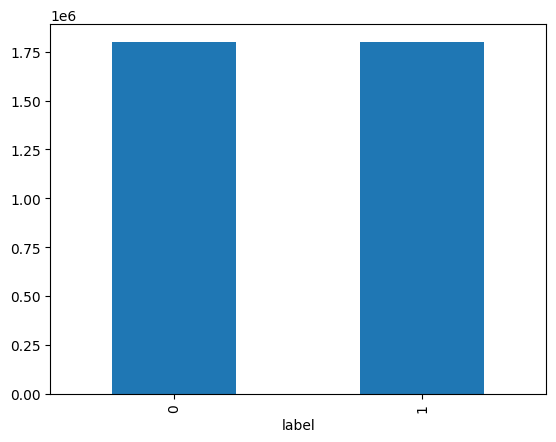

In [8]:
# Data is balanced
print(df['label'].value_counts())
df['label'].value_counts().plot(kind='bar')

In [9]:
# We're going to use only 10000 records from the data for faster training
df = df[0:30000]
df

,label,text
0,0,Stuning even for the non-gamer: This sound tra...
1,0,The best soundtrack ever to anything.: I'm rea...
2,0,Amazing!: This soundtrack is my favorite music...
3,0,Excellent Soundtrack: I truly like this soundt...
4,0,"Remember, Pull Your Jaw Off The Floor After He..."
...,...,...
29995,0,Musical explosion from the upcomming music cou...
29996,0,This album is great!!: t.A.T.u is the greatest...
29997,0,Surprisingly Good: I wasn't expecting much fro...
29998,0,Amazing: The sound that T.A.T.U. has is very i...


label
0    15428
1    14572
Name: count, dtype: int64


<Axes: xlabel='label'>

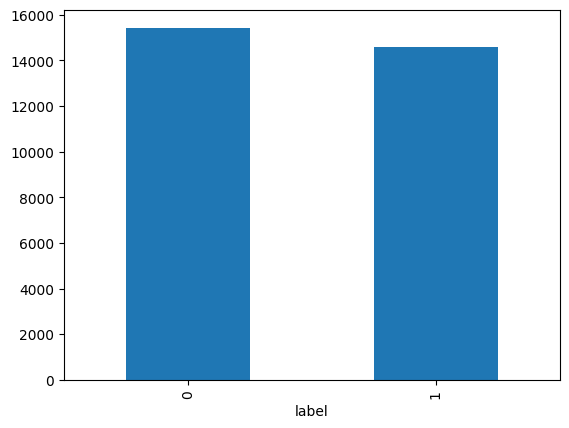

In [10]:
# Data is balanced
print(df['label'].value_counts())
df['label'].value_counts().plot(kind='bar')

In [12]:
!pip install spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.2/29.2 MB 35.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.3/124.3 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 74.6 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.8/204.8 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.9/156.9 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.0/183.0 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 81.5 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 82.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 3.5 MB/s eta 0:00:00
     

In [13]:
import spacy

# Aspect Extraction using spaCy
nlp = spacy.load('en_core_web_sm')
def extract_aspects(text):
    doc = nlp(text)
    aspects = [token.text for token in doc if token.pos_ in ["NOUN", "PROPN"]]
    return aspects if aspects else ["General"]  # If no aspect found, assign 'General'

df['aspects'] = df['text'].apply(extract_aspects)


OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
df.info()


In [ ]:
# Data is balanced
print(df['label'].value_counts())
df['label'].value_counts().plot(kind='bar')

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import torch
from transformers import TrainingArguments, Trainer
from transformers import TrainingArguments, Trainer, BertTokenizer, BertForSequenceClassification
from transformers import EarlyStoppingCallback


In [ ]:
# Load tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)


In [ ]:
# Split data
X = df["text"].tolist()
y = df["label"].tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Tokenize dataset
X_train_tokenized = tokenizer(X_train, padding=True, truncation=True, max_length=512, return_tensors="pt")
X_test_tokenized = tokenizer(X_test, padding=True, truncation=True, max_length=512, return_tensors="pt")


In [ ]:
# Convert to PyTorch Dataset
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [ ]:
train_dataset = Dataset(X_train_tokenized, y_train)
test_dataset = Dataset(X_test_tokenized, y_test)

In [ ]:
train_dataset[3]


In [ ]:
# Define metrics function
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)

    return {
        "accuracy": accuracy_score(labels, predictions),
        "precision": precision_score(labels, predictions),
        "recall": recall_score(labels, predictions),
        "f1": f1_score(labels, predictions),
    }

In [ ]:
# Define Trainer

args = TrainingArguments(
    output_dir="output",  # This is fine
    run_name="bert_sentiment_analysis",  # Explicitly setting a meaningful run name
    num_train_epochs=1,
    per_device_train_batch_size=8,
    logging_dir="./logs",  # Optional: Define logging directory for TensorBoard
)
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)
trainer.train()


In [ ]:
!pip install wandb



In [ ]:
trainer.evaluate()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluate the model
evaluation_results = trainer.evaluate()

# Extracting metrics
metrics = ["loss", "accuracy", "precision", "recall", "f1"]
values = [evaluation_results.get(metric, 0) for metric in metrics]

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(metrics, values)
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title("Model Evaluation Metrics")
plt.ylim(0, 1)  # Assuming all values are between 0 and 1
plt.show()


In [ ]:
import torch
import re

def classify_text(text, model, tokenizer):
    # Split the text into separate sentences using commas or periods
    sentences = re.split(r'[,.]', text)
    
    results = []
    
    for sentence in sentences:
        sentence = sentence.strip()
        if sentence:  # Ignore empty strings
            device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
            model.to(device)
            inputs = tokenizer(sentence, padding=True, truncation=True, return_tensors='pt').to(device)
            
            with torch.no_grad():
                outputs = model(**inputs)
            
            predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
            
            predictions = predictions.cpu().detach().numpy()
            aspects = extract_aspects(sentence)
            
            sentiment = "Positive" if predictions[0][0] > 0.5 else "Negative"
           
            print(f"Sentence: {sentence}")
            print(f"Extracted Aspects: {aspects}")
            print(f"Predicted Sentiment: {sentiment}")
            
            results.append((sentence, sentiment, aspects))
    
    return results

predictions = classify_text("The packaging was good, but the product is bad.", model, tokenizer)


In [ ]:
predictions = classify_text("The mobile is bad", model, tokenizer)

In [ ]:
predictions = classify_text("""After purchasing such an expensive item we do not expect such damaged item box. 
The box was damaged in various places and had tape applied on the front. I don't know whether the damage was
due to the box falling or not. I am also confused whether the box and PS5 might have suffered any damage due to the fall. 
I am not satisfied. You have to give proper box packing without any damage.""", model, tokenizer)

In [ ]:
model.save_pretrained("sentiment_model")
tokenizer.save_pretrained("sentiment_model")


In [ ]:
!zip -r sentiment_model.zip sentiment_model


In [ ]:
from IPython.display import FileLink
FileLink("sentiment_model.zip")
